<a href="https://colab.research.google.com/github/AI4Finance-Foundation/FinRL/blob/master/tutorials/3-Practical/FinRL_PaperTrading_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
from finrl.train import train
from finrl.test import test
from finrl.config_tickers import DOW_30_TICKER
from finrl.config import INDICATORS
from finrl.meta.env_stock_trading.env_stocktrading_np import StockTradingEnv
from finrl.meta.env_stock_trading.env_stock_papertrading import AlpacaPaperTrading
from finrl.meta.data_processor import DataProcessor
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from common import *

import numpy as np
import pandas as pd

In [16]:
ticker_list = DOW_30_TICKER
action_dim = len(DOW_30_TICKER)
candle_time_interval = '1Min'  # '1Min'

env = StockTradingEnv

# start_date = '2019-1-1'
# end_date = '2022-1-1'
start_date = '2022-6-11'
end_date = '2022-9-1'

In [17]:
account_value = test(start_date = start_date, 
      end_date = end_date,
      ticker_list = ticker_list, 
      data_source = 'alpaca',
      time_interval= candle_time_interval, 
      technical_indicator_list= INDICATORS,
      drl_lib='elegantrl', 
      env=env,
      model_name='ppo', 
      API_KEY = API_KEY, 
      API_SECRET = API_SECRET, 
      API_BASE_URL = API_BASE_URL,
#       erl_params=ERL_PARAMS,
      cwd='./papertrading_erl/ppo_2022-6-11_2022-9-1', #current_working_dir
      if_plot=True, # to return a dataframe for backtest_plot
      break_step=1e7)

Alpaca successfully connected
Load data from data/alpaca_2022-6-11_2022-9-1.pkl
The data looks like: 
                    timestamp     open      high       low     close  \
0  2022-06-13 09:30:00-04:00  132.850  133.7000  132.6200  133.5200   
1  2022-06-13 09:30:00-04:00  237.430  238.4200  237.2600  237.4600   
2  2022-06-13 09:30:00-04:00  150.170  150.0000  149.5700  149.9099   
3  2022-06-13 09:30:00-04:00  122.650  123.2500  121.8500  121.8700   
4  2022-06-13 09:30:00-04:00  209.580  209.7500  208.8100  208.8100   
5  2022-06-13 09:30:00-04:00  170.550  172.1600  170.5200  171.6600   
6  2022-06-13 09:30:00-04:00   42.970   43.2200   42.8900   43.1500   
7  2022-06-13 09:30:00-04:00  171.350  172.0000  171.3600  171.8500   
8  2022-06-13 09:30:00-04:00   97.680   97.6100   97.0800   97.2750   
9  2022-06-13 09:30:00-04:00   60.490   60.5800   60.0100   60.0500   
10 2022-06-13 09:30:00-04:00  279.000  280.3200  278.3200  279.9900   
11 2022-06-13 09:30:00-04:00  284.260  285.00

In [18]:
#baseline stats
print("==============Get Baseline Stats===========")
baseline_df = get_baseline(
        ticker="^DJI", 
        start = start_date,
        end = end_date)

stats = backtest_stats(baseline_df, value_col_name = 'close')

==============Get Baseline Stats===========
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (56, 8)
Annual return          0.155109
Cumulative returns     0.032562
Annual volatility      0.177561
Sharpe ratio           0.914222
Calmar ratio           2.005341
Stability              0.681396
Max drawdown          -0.077348
Omega ratio            1.165266
Sortino ratio          1.392826
Skew                        NaN
Kurtosis                    NaN
Tail ratio             1.288447
Daily value at risk   -0.021726
dtype: float64


/home/zihan/anaconda3/envs/x/lib/python3.7/site-packages/pyfolio/timeseries.py:724: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


==============Compare to DJIA===========
date 56
[*********************100%***********************]  1 of 1 completed
Shape of DataFrame:  (56, 8)


/home/zihan/anaconda3/envs/x/lib/python3.7/site-packages/pyfolio/timeseries.py:724: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2022-06-13
End date,2022-08-31
Total months,2
,Backtest
Annual return,58.844%
Cumulative returns,10.831%
Annual volatility,23.547%
Sharpe ratio,2.12
Calmar ratio,6.89
Stability,0.83
Max drawdown,-8.539%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,8.54,2022-08-17,2022-08-31,NaT,NaN
1,3.75,2022-06-24,2022-06-30,2022-07-07,10
2,3.00,2022-06-15,2022-06-16,2022-06-23,7
3,2.64,2022-07-21,2022-07-26,2022-07-27,5
4,1.80,2022-07-08,2022-07-13,2022-07-15,6


/home/zihan/anaconda3/envs/x/lib/python3.7/site-packages/pyfolio/plotting.py:805: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/home/zihan/anaconda3/envs/x/lib/python3.7/site-packages/pyfolio/plotting.py:805: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/home/zihan/anaconda3/envs/x/lib/python3.7/site-packages/pyfolio/plotting.py:805: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])
/home/zihan/anaconda3/envs/x/lib/python3.7/site-packages/pyfolio/timeseries.py:541: DeprecationWarning: The default dtype for empty Series will be 'object

Stress Events,mean,min,max
New Normal,0.20%,-3.35%,3.23%


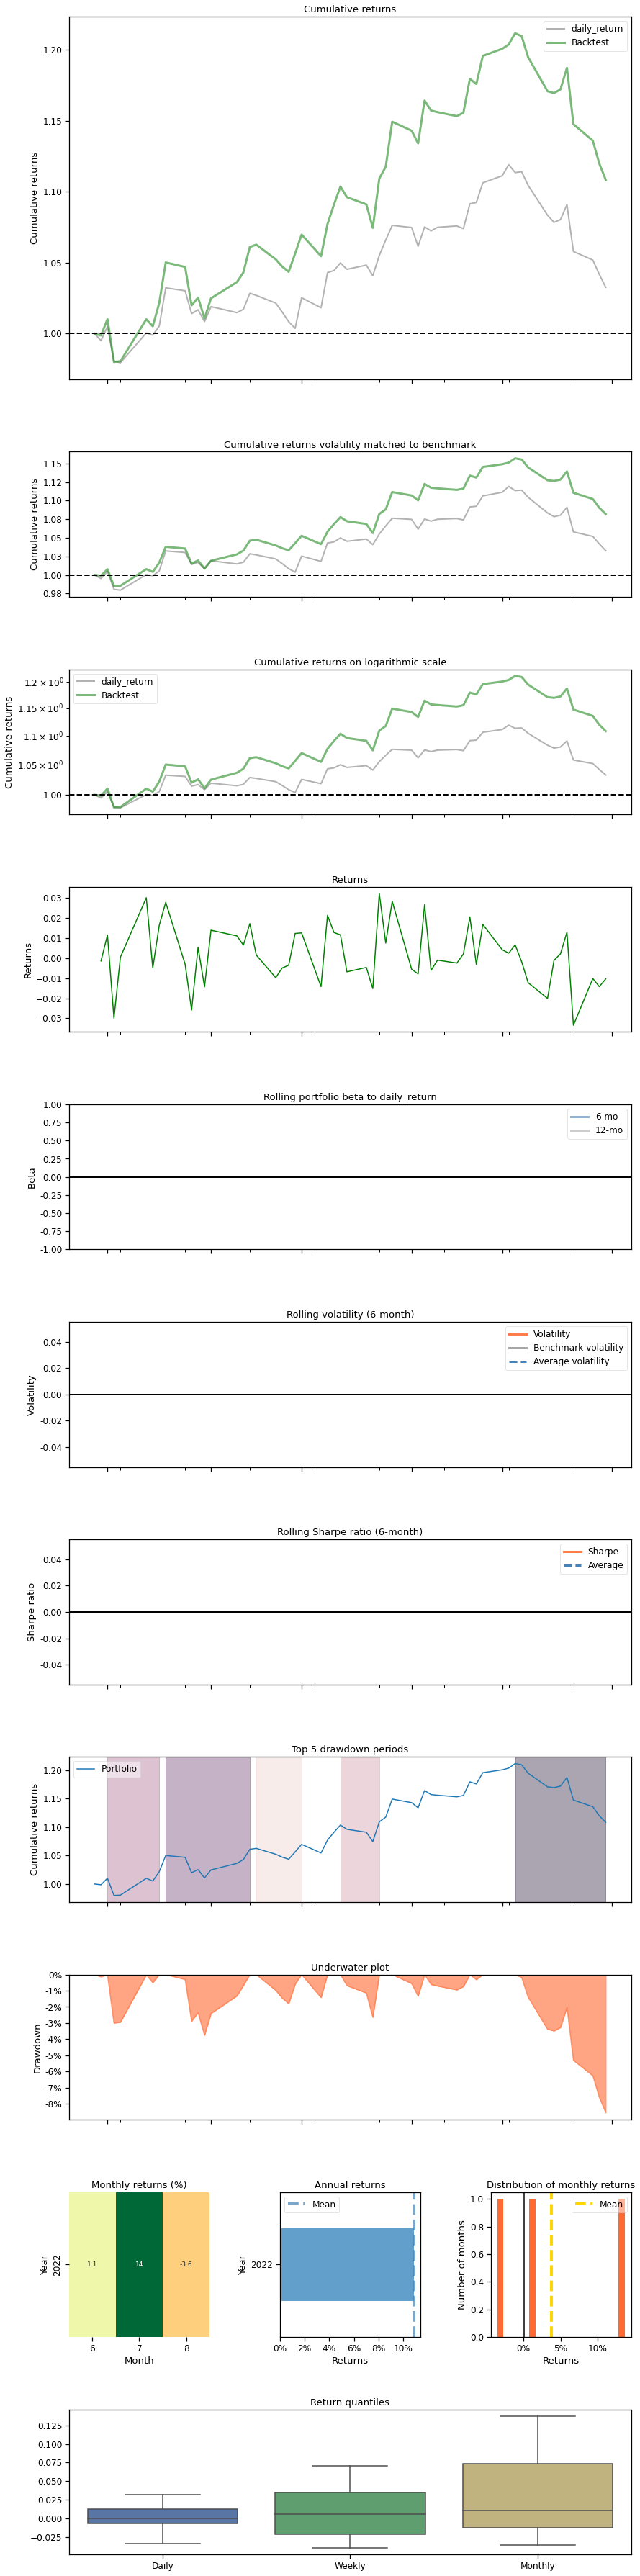

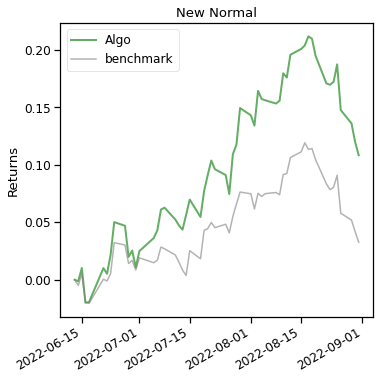

In [19]:
print("==============Compare to DJIA===========")
%matplotlib inline
# S&P 500: ^GSPC
# Dow Jones Index: ^DJI
# NASDAQ 100: ^NDX
backtest_plot(account_value, 
             baseline_ticker = '^DJI', 
             baseline_start = start_date,
             baseline_end = end_date)